In [1]:
#!/usr/bin/env python

import time
import sys
sys.path.insert(0, '../../Utilities/')
from plotting import newfig, savefig
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import operator
import itertools
from sklearn import metrics
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
#from sklearn import kernel_ridge
#from sklearn.kernel_ridge import KernelRidge
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.neighbors import RadiusNeighborsRegressor
#from sklearn import neighbors
#from sklearn.neighbors import NearestNeighbors
from sklearn import ensemble
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import ExtraTreesRegressor
#from sklearn import svm
#from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

n_jobs = 1
trial  = 1

dataset=np.loadtxt("../data/datarelax.txt")

# ... only for plotting
#dataset=np.loadtxt("../data/datarelax.txt")
#x=dataset[:,0:1]   # Temperatures
#y=dataset[:,1:50]  # Rci (relaxation source terms)

#for i in range (2,48):
#    plt.scatter(dataset[:,0:1], dataset[:,i], s=0.5, label=i)

#plt.title('$R_{ci}$ for $N_2/N$')
#plt.xlabel('T [K]')
#plt.ylabel('$R_{ci}$ $[J/m^3/s]$')
##plt.legend()
#plt.tight_layout()
#plt.savefig("relaxation_source_terms.pdf")
#plt.show()

# Here, I learn one specific level of R_ci spanning all temperatures
x=dataset[:,0:1]   # Temperatures
y=dataset[:,9:10]  # Rci (relaxation source terms)

# Here, I fix the temperature and learn all levels of R_ci
#x=dataset[150,0:1]   # Temperatures
#y=dataset[150,1:50]  # Rci (relaxation source terms)

# TODO: Here, I want to learn all T and all Rci alltogether
#x=dataset[:,0:1]   # Temperatures
#y=dataset[:,1:50]  # Rci (relaxation source terms)

# 2D Plot
#plt.scatter(x, y, s=0.5)
#plt.title('$R_{ci}$ for $N_2/N$ and i = 10')
#plt.xlabel('T [K]')
#plt.ylabel('$R_{ci}$ $[J/m^3/s]$')
#plt.tight_layout()
#plt.savefig("relaxation_source_terms.pdf")
#plt.show()

y=np.reshape(y, (-1,1))
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(x)
Y = sc_y.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=42)

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (192, 1)
Training Labels Shape: (192, 1)
Testing Features Shape: (65, 1)
Testing Labels Shape: (65, 1)


In [ ]:
# KernelRidge
#hyper_params = [{'kernel': ('poly','rbf',), 'alpha': (1e-4,1e-2,0.1,1,10,), 'gamma': (0.01,0.1,1,10,100,),}]

# k-kearest neighbor
#hyper_params = [{'algorithm': ('ball_tree', 'kd_tree', 'brute',), 'n_neighbors': (1,2,3,4,5,6,7,8,9,10,),
#                 'leaf_size': (1, 10, 20, 30, 100,), 'weights': ('uniform', 'distance',), 'p': (1,2,),}]

# Random Forest
#hyper_params = [{'n_estimators': (10, 100, 1000),
#                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5),
#                 'max_features': ('sqrt','log2',None),
#}]

# Extra Trees
#hyper_params = [{'n_estimators': (10, 100, 1000,),
#                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5,),
#                 'max_features': ('sqrt','log2','auto', None,),
#                 'max_samples': (1,10,100,1000,),
#                 'bootstrap': (True, False,),
#                 'oob_score': (True, False,),
#                 'warm_start': (True, False,),
#                 'criterion': ('mse', 'mae',),
#                 'max_depth': (1,10,100,None,),
#                 'max_leaf_nodes': (1,10,100,),
#                 'min_samples_split': (0.1,0.25,0.5,0.75,1.0,),
#                 'min_samples_leaf': (1,10,100,),
#}]

# Support Vector Machines
#hyper_params = [{'kernel': ('poly', 'rbf',), 'gamma': ('scale', 'auto',),
#                 'C': (1e-2, 1e-1, 1e0, 1e1, 1e2,), 'epsilon': (1e-2, 1e-1, 1e0, 1e1, 1e2,), }]

# GradientBoosting
hyper_params = [{'n_estimators': (10, 100, 1000,),
                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5,),
#                 'max_features': ('sqrt','log2','auto', None,),
#                 'warm_start': (True, False,),
#                 'criterion': ('friedman_mse', 'mse', 'mae',),
#                 'max_depth': (1,10,100,None,),
                 'min_samples_split': (2,5,10,100,), #0.1,0.25,0.5,0.75,1.0,),
                 'min_samples_leaf': (2,5,10,100,),
                 'loss': ('ls', 'lad', 'huber', 'quantile',),
                 # 'subsample':
                 # 'learning_rate':
}]

#est=ensemble.RandomForestRegressor()
#est=kernel_ridge.KernelRidge()
#est=neighbors.NearestNeighbors()
#est=neighbors.KNeighborsRegressor()
#est=ensemble.ExtraTreesRegressor()
#est=svm.SVR()
est=ensemble.GradientBoostingRegressor()

gs = GridSearchCV(est, cv=5, param_grid=hyper_params, verbose=2, n_jobs=n_jobs, scoring='r2')

t0 = time.time()
gs.fit(x_train, y_train.ravel())
runtime = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % runtime)

train_score_mse = mean_squared_error(      sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_mae = mean_absolute_error(     sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_evs = explained_variance_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_me  = max_error(               sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))

test_score_mse  = mean_squared_error(      sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_mae  = mean_absolute_error(     sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_evs  = explained_variance_score(sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_me   = max_error(               sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))

sorted_grid_params = sorted(gs.best_params_.items(), key=operator.itemgetter(0))

out_text = '\t'.join(['regression',
                      str(trial),
                      str(sorted_grid_params).replace('\n',','),
                      str(train_score_mse),
                      str(train_score_mae),
                      str(train_score_evs),
                      str(train_score_me),
                      str(test_score_mse),
                      str(test_score_mae),
                      str(test_score_evs),
                      str(test_score_me),
                      str(runtime)])
print(out_text)
sys.stdout.flush()

In [ ]:
# KernelRidge
#best_algorithm   = gs.best_params_['algorithm']
#best_n_neighbors = gs.best_params_['n_neighbors']
#best_leaf_size   = gs.best_params_['leaf_size']
#best_weights     = gs.best_params_['weights']
#best_p           = gs.best_params_['p']

# kNearestNeighbour
#best_kernel       = gs.best_params_['kernel']
#best_alpha        = gs.best_params_['alpha']
#best_gamma        = gs.best_params_['gamma']

# RandomForest
#best_n_estimators = gs.best_params_['n_estimators']
#best_min_weight_fraction_leaf = gs.best_params_['min_weight_fraction_leaf']
#best_max_features = gs.best_params_['max_features']

# ExtraTrees
#best_n_estimators = gs.best_params_['n_estimators']
#best_min_weight_fraction_leaf = gs.best_params_['min_weight_fraction_leaf']
#best_max_features = gs.best_params_['max_features']
#best_max_samples = gs.best_params_['max_samples']
#best_bootstrap = gs.best_params_['bootstrap']
#best_oob_score = gs.best_params_['oob_score']
#best_warm_start = gs.best_params_['warm_start']
#best_criterion = gs.best_params_['criterion']
#best_max_depth = gs.best_params_['max_depth']
#best_min_samples_split = gs.best_params_['min_samples_split']
#best_min_samples_leaf = gs.best_params_['min_samples_leaf']
#best_max_leaf_nodes = gs.best_params_['max_leaf_nodes']

# SVR
#best_kernel = gs.best_params_['kernel']
#best_gamma = gs.best_params_['gamma']
#best_C = gs.best_params_['C']
#best_epsilon = gs.best_params_['epsilon']

# GB
best_n_estimators = gs.best_params_['n_estimators']
best_min_weight_fraction_leaf = gs.best_params_['min_weight_fraction_leaf']
#best_max_features = gs.best_params_['max_features']
#best_warm_start = gs.best_params_['warm_start']
#best_criterion = gs.best_params_['criterion']
#best_max_depth = gs.best_params_['max_depth']
best_min_samples_split = gs.best_params_['min_samples_split']
best_loss = gs.best_params_['loss']
best_min_samples_leaf = gs.best_params_['min_samples_leaf']

outF = open("output.txt", "w")
#print('best_algorithm = ', best_algorithm, file=outF)
#print('best_n_neighbors = ', best_n_neighbors, file=outF)
#print('best_leaf_size = ', best_leaf_size, file=outF)
#print('best_weights = ', best_weights, file=outF)
#print('best_p = ', best_p, file=outF)
#
#print('best_kernel = ', best_kernel, file=outF)
#print('best_alpha = ', best_alpha, file=outF)
#print('best_gamma = ', best_gamma, file=outF)
#
#print('best_n_estimators = ', best_n_estimators, file=outF)
#print('best_min_weight_fraction_leaf = ', best_min_weight_fraction_leaf, file=outF)
#print('best_max_features = ', best_max_features, file=outF)
#
#print('best_n_estimators = ', best_n_estimators, file=outF)
#print('best_min_weight_fraction_leaf = ', best_min_weight_fraction_leaf, file=outF)
#print('best_max_features = ', best_max_features, file=outF)
#print('best_bootstrap = ', best_bootstrap, file=outF)
#print('best_oob_score = ', best_oob_score, file=outF)
#print('best_warm_start = ', best_warm_start, file=outF)
#print('best_criterion = ', best_criterion, file=outF)
#print('best_max_depth = ', best_max_depth, file=outF)
#print('best_min_samples_split = ', best_min_samples_split, file=outF)
#print('best_min_samples_leaf = ', best_min_samples_leaf, file=outF)
#print('best_min_samples_leaf = ', best_min_samples_leaf, file=outF)
#print('best_max_leaf_nodes = ', best_max_leaf_nodes, file=outF)
#
#print('best_kernel = ', best_kernel, file=outF)
#print('best_gamma = ', best_gamma, file=outF)
#print('best_C = ', best_C, file=outF)
#print('best_epsilon = ', best_epsilon, file=outF)
#
print('best_n_estimators = ', best_n_estimators, file=outF)
print('best_min_weight_fraction_leaf = ', best_min_weight_fraction_leaf, file=outF)
#print('best_max_features = ', best_max_features, file=outF)
#print('best_warm_start = ', best_warm_start, file=outF)
#print('best_criterion = ', best_criterion, file=outF)
#print('best_max_depth = ', best_max_depth, file=outF)
print('best_min_samples_split = ', best_min_samples_split, file=outF)
print('best_min_samples_leaf = ', best_min_samples_leaf, file=outF)
print('best_loss = ', best_loss, file=outF)
outF.close()

Complexity and bandwidth selected and model fitted in 0.107015 s
Prediction for 65 inputs in 0.005445 s
Mean Absolute Error (MAE): 0.020658524544693642
Mean Squared Error (MSE): 0.0006398063351289691
Root Mean Squared Error (RMSE): 0.025294393353645965


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


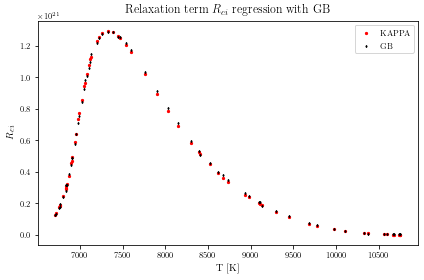

In [2]:
#regr = KNeighborsRegressor(n_neighbors=best_n_neighbors, algorithm=best_algorithm,
#                         leaf_size=best_leaf_size, weights=best_weights, p=best_p)
#
#regr = KernelRidge(kernel=best_kernel, gamma=best_gamma, alpha=best_alpha)
#
#regr = RandomForestRegressor(n_estimators=best_n_estimators,
#                             min_weight_fraction_leaf=best_min_weight_fraction_leaf,
#                             max_features=best_max_features)
#
#regr = ExtraTreesRegressor(n_estimators=best_n_estimators,
#                           min_weight_fraction_leaf=best_min_weight_fraction_leaf,
#                           max_features=best_max_features,
#                           bootstrap=best_bootstrap,
#                           oob_score=best_oob_score,
#                           warm_start=best_warm_start,
#                           criterion=best_criterion,
#                           max_depth=best_max_depth,
#                           max_leaf_nodes=best_max_leaf_nodes,
#                           min_samples_split=best_min_samples_split,
#                           min_samples_leaf=best_min_samples_leaf)
#
#regr = SVR(kernel=best_kernel, epsilon=best_epsilon, C=best_C, gamma=best_gamma)
#
regr = GradientBoostingRegressor(n_estimators=100, #best_n_estimators,
                                 min_weight_fraction_leaf=0.0, #best_min_weight_fraction_leaf,
#                                 max_features=best_max_features,
#                                 warm_start=best_warm_start,
#                                 criterion=best_criterion,
#                                 max_depth=best_max_depth,
                                 loss='ls', #best_loss,
                                 min_samples_split=5, #best_min_samples_split,
                                 min_samples_leaf=2 #best_min_samples_leaf
                                 )

t0 = time.time()
regr.fit(x_train, y_train.ravel())
regr_fit = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % regr_fit)

t0 = time.time()
y_regr = regr.predict(x_test)
regr_predict = time.time() - t0
print("Prediction for %d inputs in %.6f s" % (x_test.shape[0], regr_predict))

# open a file to append
outF = open("output.txt", "a")
print("Complexity and bandwidth selected and model fitted in %.6f s" % regr_fit, file=outF)
print("Prediction for %d inputs in %.6f s" % (x_test.shape[0], regr_predict),file=outF)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_regr), file=outF)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_regr), file=outF)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_regr)), file=outF)
outF.close()

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_regr))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_regr))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_regr)))

x_test_dim = sc_x.inverse_transform(x_test)
y_test_dim = sc_y.inverse_transform(y_test)
y_regr_dim = sc_y.inverse_transform(y_regr)

#plt.scatter(x_test_dim[:,1], y_test_dim[:], s=5, c='red',     marker='o', label='KAPPA')
#plt.scatter(x_test_dim[:,1], y_kn_dim[:],   s=2, c='magenta', marker='d', label='k-Nearest Neighbour')
plt.scatter(x_test_dim, y_test_dim, s=5, c='r', marker='o', label='KAPPA')
plt.scatter(x_test_dim, y_regr_dim, s=2, c='k', marker='d', label='GB')
plt.title('Relaxation term $R_{ci}$ regression with GB')
plt.ylabel('$R_{ci}$')
plt.xlabel('T [K] ')
plt.legend()
plt.tight_layout()
plt.savefig("regression_GB.pdf", dpi=150, crop='false')
plt.show()


#Xnew = np.array([[6750], [6800], [6850],[6900], [6950],
#                 [7000], [7050],[7100], [7150], [7200], [7300], [7400], [7500], [7600], [7700], [7800], [7900],
#                 [8000], [8100], [8200], [8300], [8400], [8500], [8600], [8700], [8800], [8900],
#                 [9000], [9100], [9200], [9300], [9400], [9500], [9600], [9700], [9800], [9900],
#                 [10000], [10100], [10200], [10300], [10400], [10500], [10757]])
#
#Xnew = scaler_x.transform(Xnew)
#ynew = model.predict(Xnew)
#
## Invert normalize
#ynew = scaler_y.inverse_transform(ynew)
#Xnew = scaler_x.inverse_transform(Xnew)
## show the inputs and predicted outputs
#for i in range(len(Xnew)):
#    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
#
#print(x.min(), x.max())
#
#plt.scatter(x[:], y[:], s=15, facecolor='red', label='MATLAB')
#plt.plot(Xnew[:], ynew[:], 'o', color='black', label='predicted', linewidth=2, markersize=5, fillstyle='none')
#plt.title('$R_{ci}$ for $N_2/N$ and i = 10')
#plt.ylabel('$R_{ci}$ $[J/m^3/s]$')
#plt.xlabel('T [K] ')
#plt.legend()
#plt.tight_layout()
#plt.savefig("dim_regression.pdf", dpi=150, crop='false')
#plt.show()